Training model for N-back = 0


Training N=0: 100%|██████████| 50/50 [00:51<00:00,  1.03s/it]
/Users/neur1s/miniconda3/lib/python3.11/site-packages/threadpoolctl.py:1010: RuntimeWarning: 
Found Intel OpenMP ('libiomp') and LLVM OpenMP ('libomp') loaded at
the same time. Both libraries are known to be incompatible and this
can cause random crashes or deadlocks on Linux when loaded in the
same Python program.
Using threadpoolctl may cause crashes or deadlocks. For more
information and possible workarounds, please see
    https://github.com/joblib/threadpoolctl/blob/master/multiple_openmp.md

  warnings.warn(msg, RuntimeWarning)


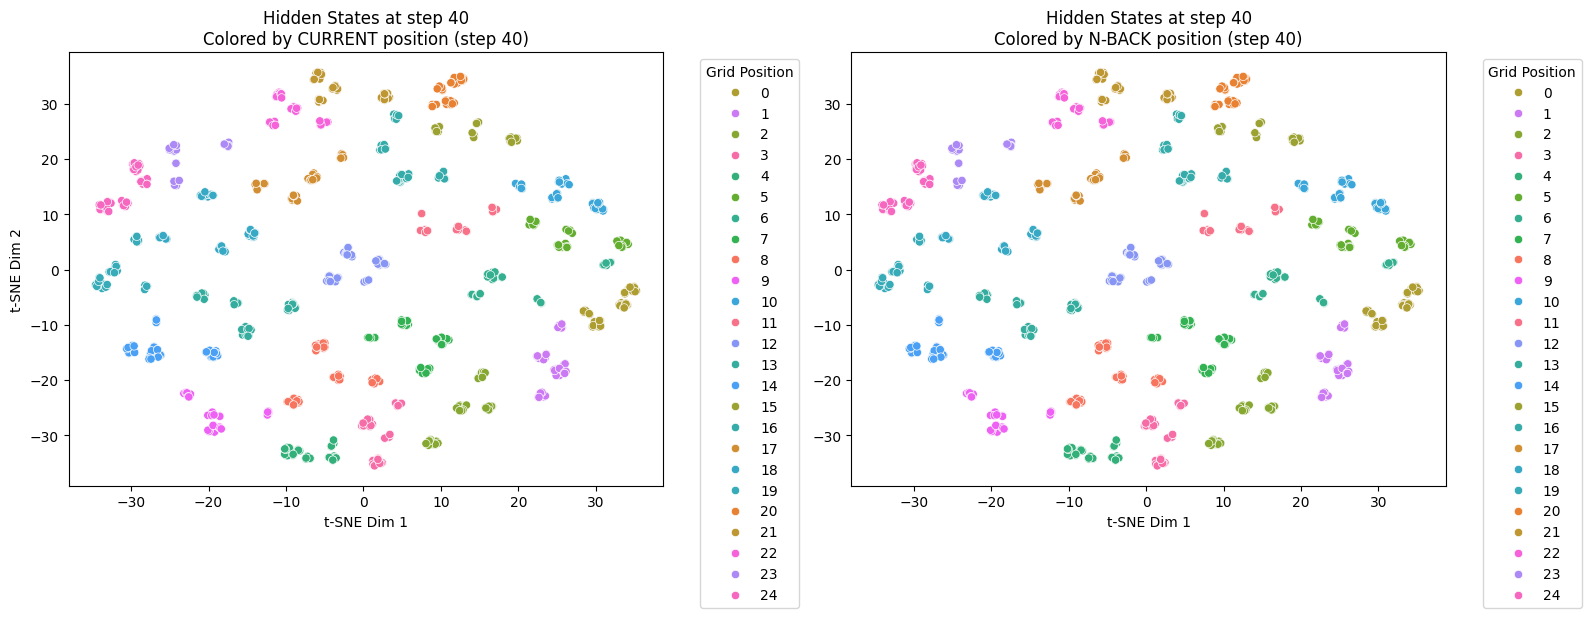

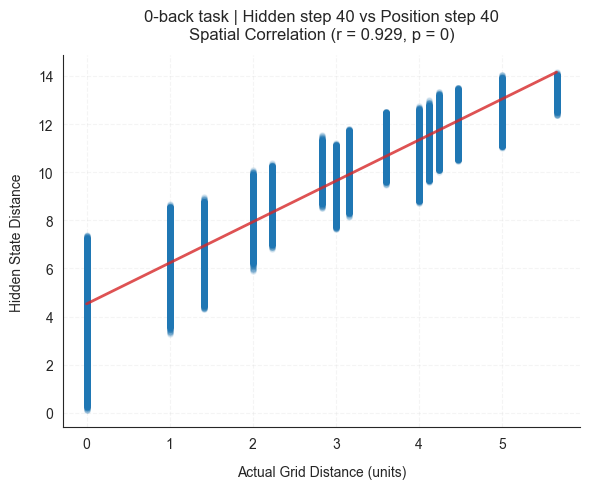

Training model for N-back = 1


Training N=1: 100%|██████████| 50/50 [00:49<00:00,  1.00it/s]


Training model for N-back = 2


Training N=2: 100%|██████████| 50/50 [00:52<00:00,  1.04s/it]


Training model for N-back = 3


Training N=3: 100%|██████████| 50/50 [00:52<00:00,  1.04s/it]


Training model for N-back = 4


Training N=4: 100%|██████████| 50/50 [00:51<00:00,  1.04s/it]


Training model for N-back = 5


Training N=5: 100%|██████████| 50/50 [00:53<00:00,  1.06s/it]


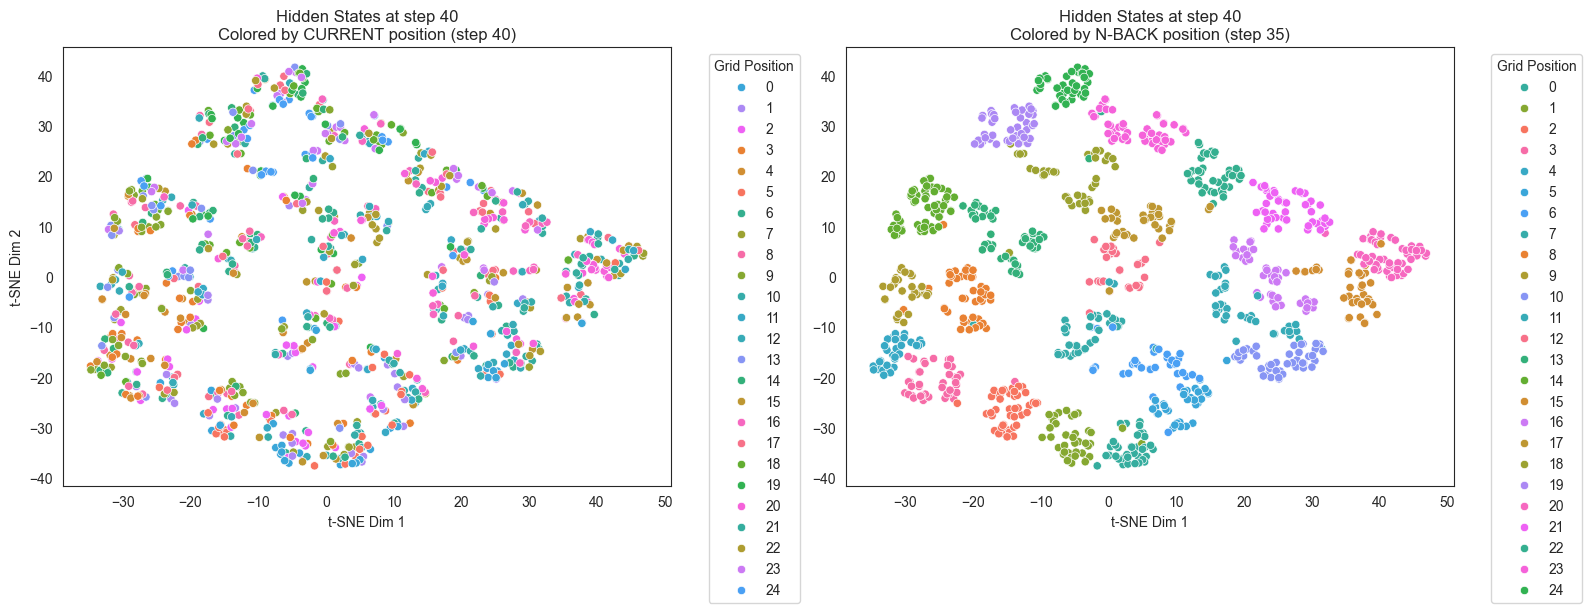

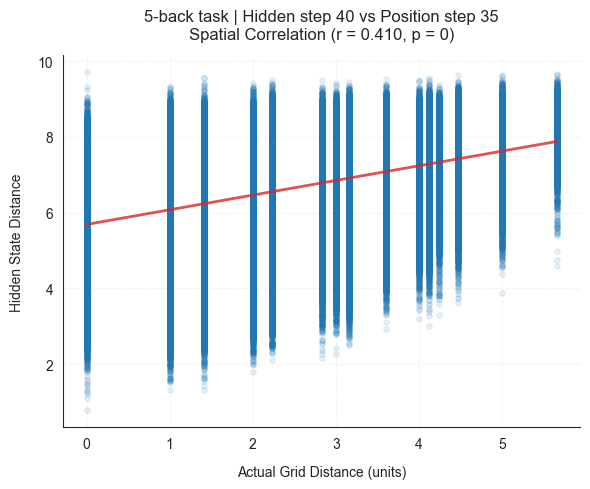

Training model for N-back = 6


Training N=6: 100%|██████████| 50/50 [00:56<00:00,  1.13s/it]


Training model for N-back = 7


Training N=7: 100%|██████████| 50/50 [00:55<00:00,  1.11s/it]


Training model for N-back = 8


Training N=8: 100%|██████████| 50/50 [00:59<00:00,  1.20s/it]


Training model for N-back = 9


Training N=9: 100%|██████████| 50/50 [00:59<00:00,  1.18s/it]


Training model for N-back = 10


Training N=10: 100%|██████████| 50/50 [00:59<00:00,  1.18s/it]


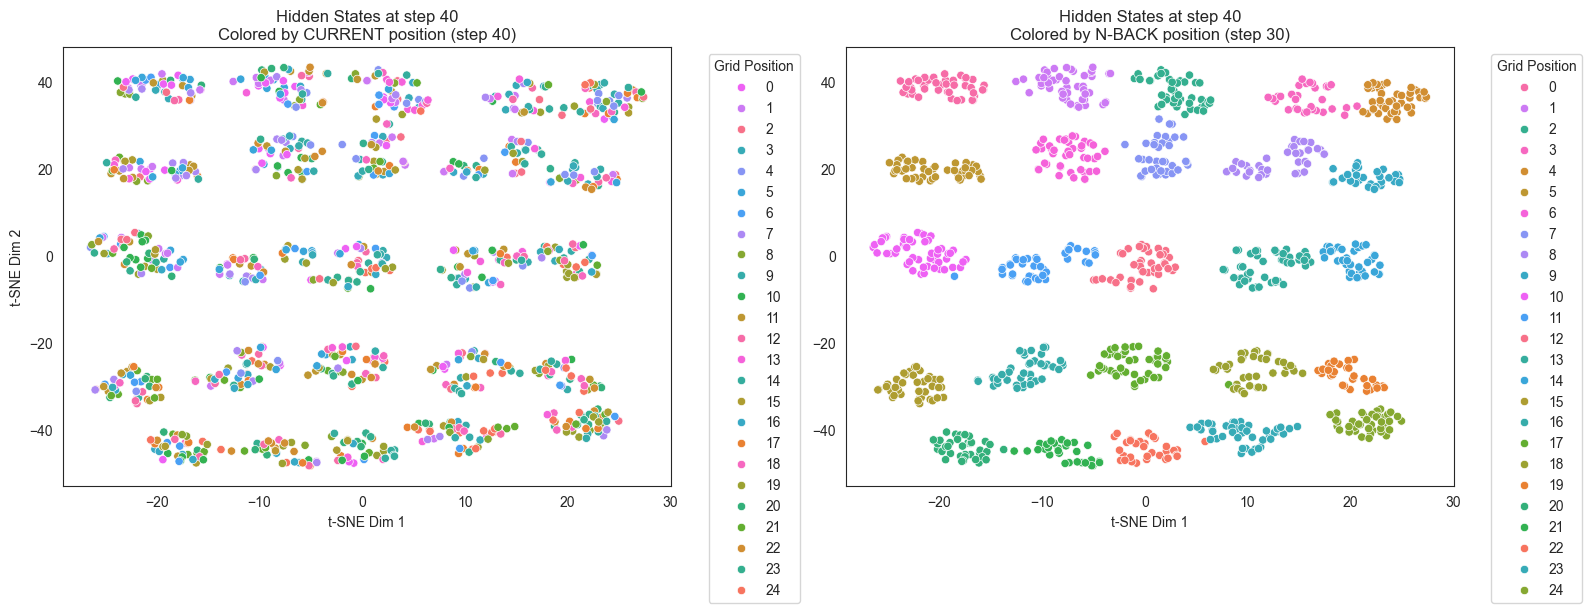

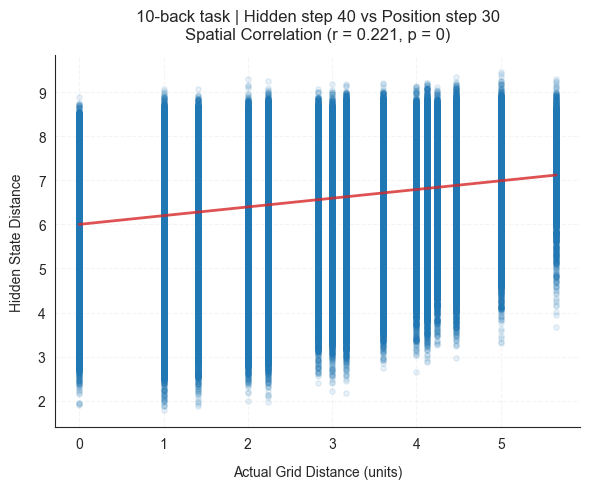

Training model for N-back = 11


Training N=11: 100%|██████████| 50/50 [00:58<00:00,  1.17s/it]


Training model for N-back = 12


Training N=12: 100%|██████████| 50/50 [01:03<00:00,  1.26s/it]


Training model for N-back = 13


Training N=13: 100%|██████████| 50/50 [00:57<00:00,  1.16s/it]


Training model for N-back = 14


Training N=14: 100%|██████████| 50/50 [00:58<00:00,  1.17s/it]


Training model for N-back = 15


Training N=15: 100%|██████████| 50/50 [00:58<00:00,  1.18s/it]


Training model for N-back = 16


Training N=16: 100%|██████████| 50/50 [00:59<00:00,  1.18s/it]


Training model for N-back = 17


Training N=17: 100%|██████████| 50/50 [01:00<00:00,  1.21s/it]


Training model for N-back = 18


Training N=18: 100%|██████████| 50/50 [01:01<00:00,  1.24s/it]


Training model for N-back = 19


Training N=19: 100%|██████████| 50/50 [01:02<00:00,  1.26s/it]


Training model for N-back = 20


Training N=20: 100%|██████████| 50/50 [01:03<00:00,  1.26s/it]


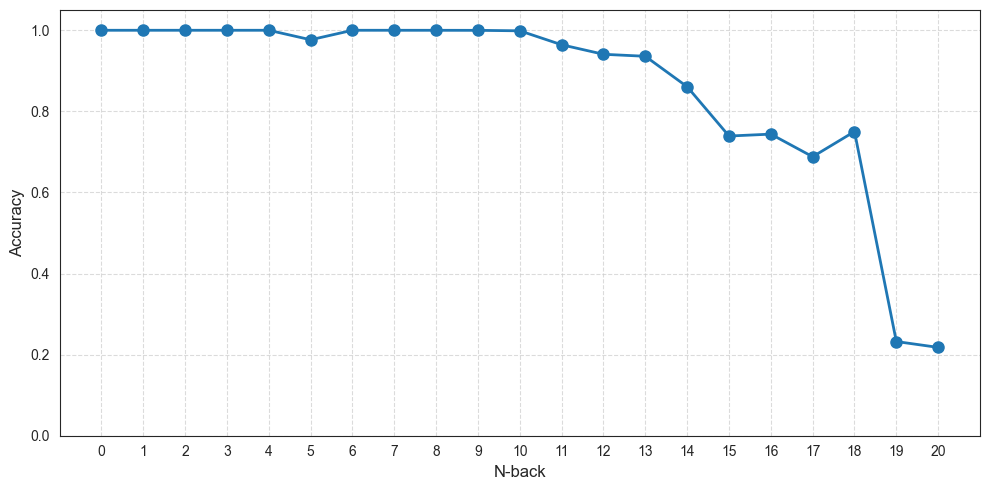

In [1]:
from lstm_explorer import sample_and_train, get_hidden_states, NBackDataset
from lstm_plots import plot_tsne, plot_spatial_correlation, plot_accuracies

accuracies = []
n_max=20
for n_back in range(n_max + 1):
    print(f"Training model for N-back = {n_back}")
    model, accuracy, test_loss, train_loss = sample_and_train(n_back)
    accuracies.append(accuracy)

    if n_back in [0, 5, 10]: # Only plot for N = 0, 5, 10
        # Get hidden states for t-SNE and correlation
        test_dataset = NBackDataset(100_000, n_back) 
        hidden_states, current_labels, nback_labels = get_hidden_states(
            model, test_dataset, time_step=40, n_back=n_back
        )

        # t-SNE visualization
        plot_tsne(hidden_states, current_labels, nback_labels, n_back)

        # Spatial correlation
        plot_spatial_correlation(
            hidden_states=hidden_states,
            grid_positions=current_labels,
            hidden_step=40,
            N=n_back
        )

# Plot accuracy curve across all N
plot_accuracies(accuracies)